In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [84]:
Mymodel = LinearRegression()
pl = PolynomialFeatures(degree = 2)

In [85]:
df = pd.read_csv('Polynomial_regression.csv')
df

,area,price
0,100,1000000
1,200,1400000
2,300,1500000
3,350,2000000
4,400,2800000
5,450,3500000
6,500,4500000
7,600,6000000
8,700,7000000


In [86]:
x_train , x_test , y_train , y_test = train_test_split(df[['area']] , df.price , test_size=0.2)

In [87]:
X = df[['area']].values
X

array([[100],
       [200],
       [300],
       [350],
       [400],
       [450],
       [500],
       [600],
       [700]], dtype=int64)

In [88]:
Y = df.price
Y

0    1000000
1    1400000
2    1500000
3    2000000
4    2800000
5    3500000
6    4500000
7    6000000
8    7000000
Name: price, dtype: int64

In [89]:
Mymodel.fit(X , Y)

LinearRegression()

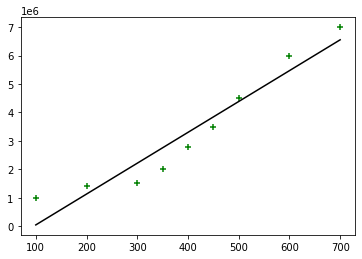

In [118]:
plt.scatter(X , Y ,marker='+', color = 'green')
plt.plot(X , Mymodel.predict(X) , color = 'black')

In [91]:
x_test

,area
6,500
3,350


In [106]:
y_test

6    4500000
3    2000000
Name: price, dtype: int64

In [92]:
Mymodel.predict(x_test)

c:\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([4385964.9122807 , 2757017.54385965])

In [94]:
Mymodel.score(x_test , y_test)

c:\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.812454539858418

In [96]:
X_pl = pl.fit_transform(X)
X_pl

array([[1.000e+00, 1.000e+02, 1.000e+04],
       [1.000e+00, 2.000e+02, 4.000e+04],
       [1.000e+00, 3.000e+02, 9.000e+04],
       [1.000e+00, 3.500e+02, 1.225e+05],
       [1.000e+00, 4.000e+02, 1.600e+05],
       [1.000e+00, 4.500e+02, 2.025e+05],
       [1.000e+00, 5.000e+02, 2.500e+05],
       [1.000e+00, 6.000e+02, 3.600e+05],
       [1.000e+00, 7.000e+02, 4.900e+05]])

In [97]:
Reg = LinearRegression()

In [98]:
Reg.fit(X_pl , Y)

LinearRegression()

In [99]:
X_gr = np.arange(min(X) , max(X) , 0.2)
X_gr

array([100. , 100.2, 100.4, ..., 699.4, 699.6, 699.8])

In [100]:
X_Gr = X_gr.reshape(len(X_gr) , 1)
X_Gr

array([[100. ],
       [100.2],
       [100.4],
       ...,
       [699.4],
       [699.6],
       [699.8]])

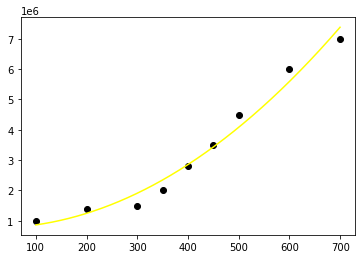

In [116]:
plt.scatter(X , Y , color = 'black')
plt.plot(X_Gr , Reg.predict(pl.fit_transform(X_Gr)) , color = 'yellow')

In [102]:
x_test

,area
6,500
3,350


In [105]:
y_test

6    4500000
3    2000000
Name: price, dtype: int64

In [104]:
Reg.predict(pl.fit_transform(x_test))

array([4080533.97957703, 2345860.51906625])

In [108]:
Reg.score(pl.fit_transform(x_test) , y_test)

0.9054172028997578